<a href="https://colab.research.google.com/github/RidhaLOUZE/cnn-test/blob/main/final_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')#connect drive

Mounted at /content/drive


In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ridhalouze1","key":"55525d6ae6a81d2236a09ee6fe6d312d"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces

100% 3.74G/3.75G [00:42<00:00, 78.0MB/s]
100% 3.75G/3.75G [00:42<00:00, 94.2MB/s]


In [8]:
! mkdir 140k_2

In [9]:
! unzip -qq /content/140k-real-and-fake-faces.zip -d 140k_2

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from keras.layers import Dense, Flatten, AveragePooling2D, Dropout, InputLayer, BatchNormalization, Conv2D, MaxPool2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3,preprocess_input
import keras
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers,Sequential
from tensorflow.keras import activations
from tensorflow.keras.optimizers import SGD

In [11]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [12]:
src_dir = "/content/140k_2/real_vs_fake/real-vs-fake/test/fake"
dst_dir = "/content/140k_2/real_vs_fake/real-vs-fake/train/fake"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [13]:
src_dir = "/content/140k_2/real_vs_fake/real-vs-fake/valid/fake"
dst_dir = "/content/140k_2/real_vs_fake/real-vs-fake/train/fake"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [14]:
src_dir = "/content/140k_2/real_vs_fake/real-vs-fake/test/real"
dst_dir = "/content/140k_2/real_vs_fake/real-vs-fake/train/real"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [15]:
src_dir = "/content/140k_2/real_vs_fake/real-vs-fake/valid/real"
dst_dir = "/content/140k_2/real_vs_fake/real-vs-fake/train/real"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [16]:
print(len(os.listdir("/content/140k_2/real_vs_fake/real-vs-fake/train/fake")))
print(len(os.listdir("/content/140k_2/real_vs_fake/real-vs-fake/train/real")))
#print(len(os.listdir("/content/140k_2/real_vs_fake/real-vs-fake/valid/fake")))
#print(len(os.listdir("/content/140k_2/real_vs_fake/real-vs-fake/valid/real")))
#im = os.listdir("/content/140k/real_vs_fake/real-vs-fake/train/real/00010.jpg")
#print(im.shape)

70000
70000


In [17]:
# Python 3 code to rename multiple
# files in a directory or folder
 
# importing os module
import os
 
# Function to rename multiple files
def main():
   #you should change the both to update name of both of them
    folder = "/content/140k_2/real_vs_fake/real-vs-fake/train/fake"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"fake. {str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)
 
# Driver Code
if __name__ == '__main__':
     
    # Calling main() function
    main()

In [18]:
# Python 3 code to rename multiple
# files in a directory or folder
 
# importing os module
import os
 
# Function to rename multiple files
def main():
   #you should change the both to update name of both of them
    folder = "/content/140k_2/real_vs_fake/real-vs-fake/train/real"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"real. {str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)
 
# Driver Code
if __name__ == '__main__':
     
    # Calling main() function
    main()

In [19]:
src_dir = "/content/140k_2/real_vs_fake/real-vs-fake/train/fake"
dst_dir = "/content/pre_dataset"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [20]:
src_dir = "/content/140k_2/real_vs_fake/real-vs-fake/train/real"
dst_dir = "/content/pre_dataset"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [21]:
filenames = os.listdir("/content/pre_dataset")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'fake':
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

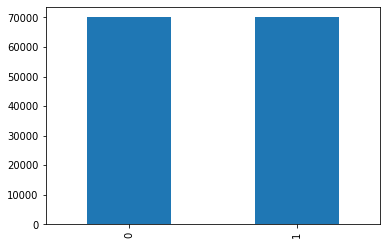

In [22]:
df['category'].value_counts().plot.bar()

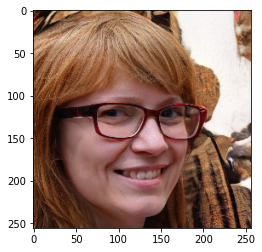

In [23]:
import random
sample = random.choice(filenames)
image = load_img("/content/pre_dataset/"+sample)
plt.imshow(image)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have fake and real classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [39]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/projects/H5/best_model_140k.h5",
                     monitor = "val_accuracy",
                     verbose = 1,
                     save_best_only = True)
es = EarlyStopping(monitor = "val_accuracy",
                   min_delta =0.1,
                   patience =10,
                   verbose= 1)

cb = [mc,es]

In [26]:
earlystop = EarlyStopping(patience=10)

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.1)

In [28]:
callbacks = [earlystop, learning_rate_reduction,mc]

In [29]:
df["category"] = df["category"].replace({0: 'Fake', 1: 'Real'}) 

In [30]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

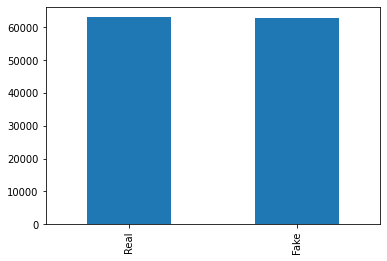

In [31]:
train_df['category'].value_counts().plot.bar()

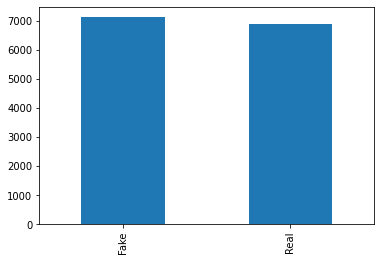

In [32]:
validate_df['category'].value_counts().plot.bar()

In [33]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [34]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/pre_dataset/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 126000 validated image filenames belonging to 2 classes.


In [35]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/pre_dataset/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 14000 validated image filenames belonging to 2 classes.


In [36]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/pre_dataset/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


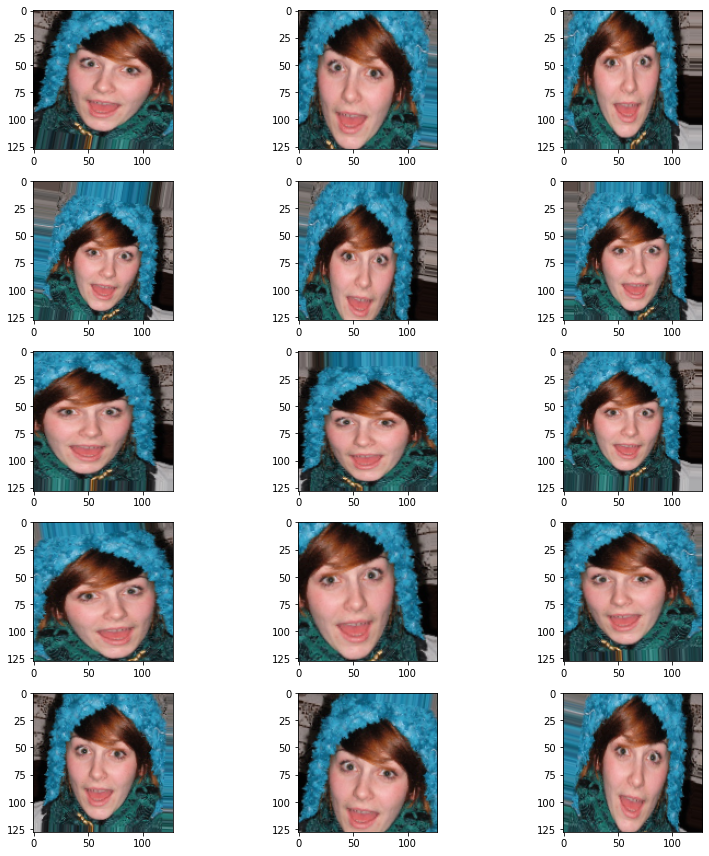

In [37]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if FAST_RUN else 7
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=cb
)

Epoch 1/7
8400/8400 [==============================] - ETA: 0s - loss: 0.4752 - accuracy: 0.7763
Epoch 1: val_accuracy improved from -inf to 0.80314, saving model to /content/drive/MyDrive/projects/H5/best_model_140k.h5
8400/8400 [==============================] - 5142s 612ms/step - loss: 0.4752 - accuracy: 0.7763 - val_loss: 0.4505 - val_accuracy: 0.8031
Epoch 2/7
8400/8400 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.7913
Epoch 2: val_accuracy did not improve from 0.80314
8400/8400 [==============================] - 5018s 597ms/step - loss: 0.4521 - accuracy: 0.7913 - val_loss: 0.4508 - val_accuracy: 0.7994
Epoch 3/7
8400/8400 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.8028
Epoch 3: val_accuracy improved from 0.80314 to 0.83437, saving model to /content/drive/MyDrive/projects/H5/best_model_140k.h5
8400/8400 [==============================] - 5102s 607ms/step - loss: 0.4335 - accuracy: 0.8028 - val_loss: 0.3852 - val_accuracy: 0.

NameError: ignored

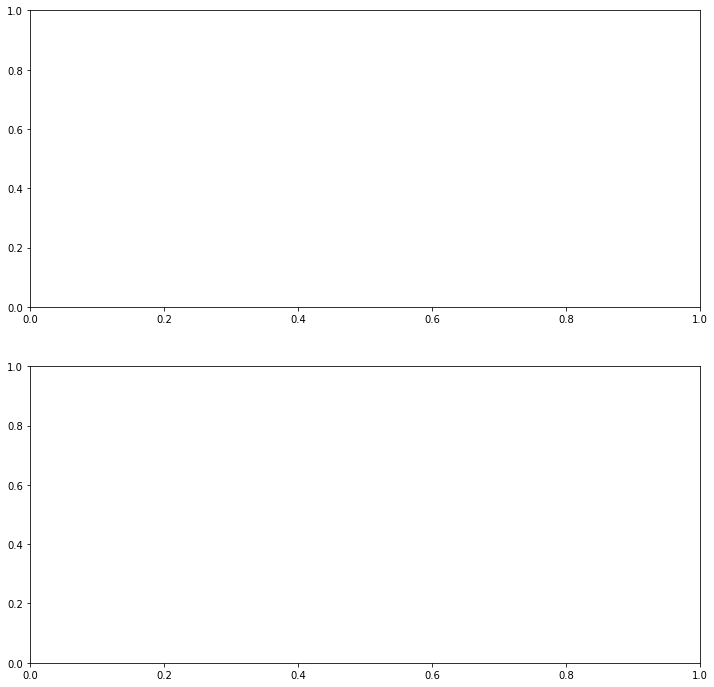

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()